In [2]:
from numpy import *
from time import sleep

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

def selectJrand(i,m):
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

def clipAlpha(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj


In [84]:
def simpleSMO(dataMat,labelList,C,toler,maxIter):
    dataMatrix=mat(dataMat)
    labelMatrix=mat(labelList).transpose()
    m,n=dataMatrix.shape
    alpha=mat(zeros((m,1)));b=0
    iternum=0
    while (iternum<maxIter):
        isChange=0
        for i in range(m):
            w=(multiply(alpha,labelMatrix)).T*dataMatrix
            fxi=w*dataMatrix[i,:].T+b
            Ei=fxi-float(labelMatrix[i])
            #不满足KKT条件的情况
            if(labelMatrix[i]*Ei<toler and alpha[i]<C) or (labelMatrix[i]*Ei>toler and alpha[i]>0):
                j=selectJrand(i,m)
                fxj=w*dataMatrix[j,:].T+b
                Ej=fxj-float(labelMatrix[j])
                alphaiold=alpha[i].copy();alphajold=alpha[j].copy()
                if(labelMatrix[i]==labelMatrix[j]):
                    L=max(0,alphaiold+alphajold-C);H=min(C,alphaiold+alphajold)
                if(labelMatrix[i]!=labelMatrix[j]):
                    L=max(0,alphajold-alphaiold);H=min(C,C+alphajold-alphaiold)
                if L==H:
                    continue
                eta=2.0*dataMatrix[i,:]*dataMatrix[j,:].T-dataMatrix[i,:]*dataMatrix[i,:].T-dataMatrix[j,:]*dataMatrix[j,:].T
                alpha[j]=alphajold-labelMatrix[j]*(Ei-Ej)/eta
                alpha[j]=clipAlpha(alpha[j],H,L)
                alpha[i]=alphaiold+labelMatrix[i]*labelMatrix[j]*(alphajold-alpha[j])
                b1=b-Ei-labelMatrix[i]*(alpha[i]-alphaiold)*dataMatrix[i,:]*dataMatrix[i,:].T-labelMatrix[j]*(alpha[j]-alphajold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2=b-Ej-labelMatrix[i]*(alpha[i]-alphaiold)*dataMatrix[i,:]*dataMatrix[j,:].T-labelMatrix[j]*(alpha[j]-alphajold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if alpha[i]>0 and alpha[i]<C: b=b1
                elif alpha[j]>0 and alpha[j]<C: b=b2
                else: b = (b1 +b2) / 2.0
                isChange+=1
#                 print 'iter: %d ,pair changed %d'%(iternum,isChange)
        if isChange!=0: 
            iternum+=1
#             print u'已经过第%d次循环'%(iternum-1)
        else:
            iternum=0
#             print u'参数没有改变'
    w=(multiply(alpha,labelMatrix)).T*dataMatrix
    return alpha,b,w

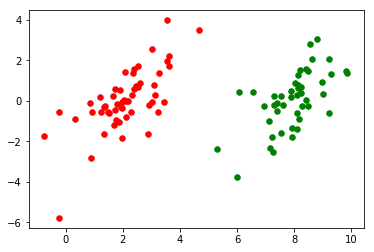

In [27]:
dataMat,labelMat=loadDataSet('testSet.txt')
import matplotlib.pyplot as plt
x1=[];y1=[]
x2=[];y2=[]
for i in range(len(labelMat)):
    if labelMat[i]==-1:
        x1.append(dataMat[i][0])
        y1.append(dataMat[i][1])
    if labelMat[i]==1:
        x2.append(dataMat[i][0])
        y2.append(dataMat[i][1])
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x1,y1,s=30,c='red')
ax.scatter(x2,y2,s=30,c='green')
plt.show()

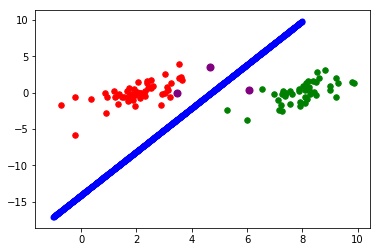

0:00:13.255000


In [100]:
import datetime
begin = datetime.datetime.now()
alpha,b,w=simpleSMO(dataMat,labelMat,0.6,0.001,2000)
x1=[];y1=[]
x2=[];y2=[]
x3=[];y3=[]
for i in range(len(labelMat)):
    if labelMat[i]==-1:
        x1.append(dataMat[i][0])
        y1.append(dataMat[i][1])
    if labelMat[i]==1:
        x2.append(dataMat[i][0])
        y2.append(dataMat[i][1])
    if alpha[i]>0:
        x3.append(dataMat[i][0])
        y3.append(dataMat[i][1])
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x1,y1,s=30,c='red')
ax.scatter(x2,y2,s=30,c='green')
ax.scatter(x3,y3,s=50,c='purple')
x=arange(-1.0,8.0,0.01)
y=(-array(w)[0][0]*x-b)/array(w)[0][1]
ax.scatter(x,y,c='blue',linewidths=0)
plt.show()
end = datetime.datetime.now()
print end-begin

In [88]:
def adSMO(dataMat,labelList,C,toler,maxIter):
    dataMatrix=mat(dataMat)
    labelMatrix=mat(labelList).transpose()
    m,n=dataMatrix.shape
    alpha=mat(zeros((m,1)));b=0
    iternum=0
    while (iternum<maxIter):
        isChange=0
        for i in range(m):
            w=(multiply(alpha,labelMatrix)).T*dataMatrix
            fxi=w*dataMatrix[i,:].T+b
            Ei=fxi-float(labelMatrix[i])
            j=0
            #不满足KKT条件的情况
            if(labelMatrix[i]*Ei<toler and alpha[i]<C) or (labelMatrix[i]*Ei>toler and alpha[i]>0):
                validList=nonzero(alpha)[0]
                if len(validList)>0:
                    maxdelta=0
                    for k in validList:
                        if k==i:
                            continue
                        Ek=w*dataMatrix[k,:].T+b-float(labelMatrix[k])
                        delta=abs(Ek-Ei)
                        if delta>maxdelta:
                            j=k;maxdelta=delta
                else:
                    j=selectJrand(i,m)
                fxj=w*dataMatrix[j,:].T+b
                Ej=fxj-float(labelMatrix[j])
                alphaiold=alpha[i].copy();alphajold=alpha[j].copy()
                if(labelMatrix[i]==labelMatrix[j]):
                    L=max(0,alphaiold+alphajold-C);H=min(C,alphaiold+alphajold)
                if(labelMatrix[i]!=labelMatrix[j]):
                    L=max(0,alphajold-alphaiold);H=min(C,C+alphajold-alphaiold)
                if L==H:
                    continue
                eta=2.0*dataMatrix[i,:]*dataMatrix[j,:].T-dataMatrix[i,:]*dataMatrix[i,:].T-dataMatrix[j,:]*dataMatrix[j,:].T
                alpha[j]=alphajold-labelMatrix[j]*(Ei-Ej)/eta
                alpha[j]=clipAlpha(alpha[j],H,L)
                alpha[i]=alphaiold+labelMatrix[i]*labelMatrix[j]*(alphajold-alpha[j])
                b1=b-Ei-labelMatrix[i]*(alpha[i]-alphaiold)*dataMatrix[i,:]*dataMatrix[i,:].T-labelMatrix[j]*(alpha[j]-alphajold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2=b-Ej-labelMatrix[i]*(alpha[i]-alphaiold)*dataMatrix[i,:]*dataMatrix[j,:].T-labelMatrix[j]*(alpha[j]-alphajold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if alpha[i]>0 and alpha[i]<C: b=b1
                elif alpha[j]>0 and alpha[j]<C: b=b2
                else: b = (b1 +b2) / 2.0
                isChange+=1
#                 print 'iter: %d ,pair changed %d'%(iternum,isChange)
        if isChange!=0: 
            iternum+=1
#             print u'已经过第%d次循环'%(iternum-1)
        else:
            iternum=0
#             print u'参数没有改变'
    w=(multiply(alpha,labelMatrix)).T*dataMatrix
    return alpha,b,w

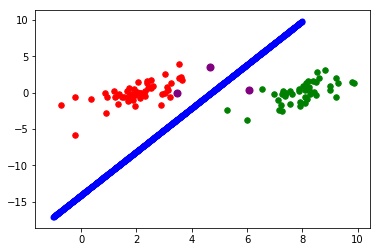

0:00:13.155000


In [101]:
begin = datetime.datetime.now()
alpha,b,w=adSMO(dataMat,labelMat,0.6,0.001,2000)
x1=[];y1=[]
x2=[];y2=[]
x3=[];y3=[]
for i in range(len(labelMat)):
    if labelMat[i]==-1:
        x1.append(dataMat[i][0])
        y1.append(dataMat[i][1])
    if labelMat[i]==1:
        x2.append(dataMat[i][0])
        y2.append(dataMat[i][1])
    if alpha[i]>0:
        x3.append(dataMat[i][0])
        y3.append(dataMat[i][1])
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x1,y1,s=30,c='red')
ax.scatter(x2,y2,s=30,c='green')
ax.scatter(x3,y3,s=50,c='purple')
x=arange(-1.0,8.0,0.01)
y=(-array(w)[0][0]*x-b)/array(w)[0][1]
ax.scatter(x,y,c='blue',linewidths=0)
plt.show()
end = datetime.datetime.now()
print end-begin

In [102]:
class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)
        
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
        
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print "fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print "non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print "iteration number: %d" % iter
    w=(multiply(oS.alphas,oS.b)).T*dataMatIn
    return oS.b,oS.alphas

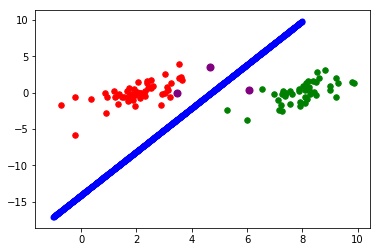

0:00:13.140000


In [103]:
begin = datetime.datetime.now()
alpha,b,w=adSMO(dataMat,labelMat,0.6,0.001,2000)
x1=[];y1=[]
x2=[];y2=[]
x3=[];y3=[]
for i in range(len(labelMat)):
    if labelMat[i]==-1:
        x1.append(dataMat[i][0])
        y1.append(dataMat[i][1])
    if labelMat[i]==1:
        x2.append(dataMat[i][0])
        y2.append(dataMat[i][1])
    if alpha[i]>0:
        x3.append(dataMat[i][0])
        y3.append(dataMat[i][1])
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x1,y1,s=30,c='red')
ax.scatter(x2,y2,s=30,c='green')
ax.scatter(x3,y3,s=50,c='purple')
x=arange(-1.0,8.0,0.01)
y=(-array(w)[0][0]*x-b)/array(w)[0][1]
ax.scatter(x,y,c='blue',linewidths=0)
plt.show()
end = datetime.datetime.now()
print end-begin

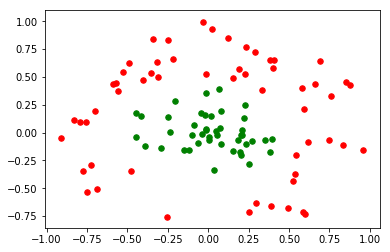

In [106]:
dataMat,labelMat=loadDataSet('testSetRBF.txt')
import matplotlib.pyplot as plt
x1=[];y1=[]
x2=[];y2=[]
for i in range(len(labelMat)):
    if labelMat[i]==-1:
        x1.append(dataMat[i][0])
        y1.append(dataMat[i][1])
    if labelMat[i]==1:
        x2.append(dataMat[i][0])
        y2.append(dataMat[i][1])
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x1,y1,s=30,c='red')
ax.scatter(x2,y2,s=30,c='green')
plt.show()

In [131]:
def calKernel(X,A,sigma):
    m,n=X.shape
    k=zeros((m,1))
    deltarow=X-tile(A,(X.shape[0],1))
    for i in range(m):
        k[i]=deltarow[i,:]*deltarow[i,:].T
    k=exp(k/(-2*sigma**2))
    return k
    
def adKernel(dataMat,labelList,C,toler,maxIter,sigma):
    dataMatrix=mat(dataMat)
    labelMatrix=mat(labelList).transpose()
    m,n=dataMatrix.shape
    alpha=mat(zeros((m,1)));b=0
    iternum=0
    while (iternum<maxIter):
        isChange=0
        for i in range(m):
            fxi=(multiply(alpha,labelMatrix)).T*calKernel(dataMatrix,dataMatrix[i,:],sigma)+b
            Ei=fxi-float(labelMatrix[i])
            j=0
            #不满足KKT条件的情况
            if(labelMatrix[i]*Ei<toler and alpha[i]<C) or (labelMatrix[i]*Ei>toler and alpha[i]>0):
                validList=nonzero(alpha)[0]
                if len(validList)>0:
                    maxdelta=0
                    for k in validList:
                        if k==i:
                            continue
                        Ek=(multiply(alpha,labelMatrix)).T*calKernel(dataMatrix,dataMatrix[j,:],sigma)+b-float(labelMatrix[k])
                        delta=abs(Ek-Ei)
                        if delta>maxdelta:
                            j=k;maxdelta=delta
                else:
                    j=selectJrand(i,m)
                fxj=(multiply(alpha,labelMatrix)).T*calKernel(dataMatrix,dataMatrix[j,:],sigma)+b
                Ej=fxj-float(labelMatrix[j])
                alphaiold=alpha[i].copy();alphajold=alpha[j].copy()
                if(labelMatrix[i]==labelMatrix[j]):
                    L=max(0,alphaiold+alphajold-C);H=min(C,alphaiold+alphajold)
                if(labelMatrix[i]!=labelMatrix[j]):
                    L=max(0,alphajold-alphaiold);H=min(C,C+alphajold-alphaiold)
                if L==H:
                    continue
                eta=2.0*calKernel(dataMatrix[i,:],dataMatrix[j,:],sigma)-calKernel(dataMatrix[i,:],dataMatrix[i,:],sigma)-calKernel(dataMatrix[j,:],dataMatrix[j,:],sigma)
                alpha[j]=alphajold-labelMatrix[j]*(Ei-Ej)/eta
                alpha[j]=clipAlpha(alpha[j],H,L)
                alpha[i]=alphaiold+labelMatrix[i]*labelMatrix[j]*(alphajold-alpha[j])
                b1=b-Ei-labelMatrix[i]*(alpha[i]-alphaiold)*calKernel(dataMatrix[i,:],dataMatrix[i,:],sigma)-labelMatrix[j]*(alpha[j]-alphajold)*calKernel(dataMatrix[i,:],dataMatrix[j,:],sigma)
                b2=b-Ej-labelMatrix[i]*(alpha[i]-alphaiold)*calKernel(dataMatrix[i,:],dataMatrix[j,:],sigma)-labelMatrix[j]*(alpha[j]-alphajold)*calKernel(dataMatrix[j,:],dataMatrix[j,:],sigma)
                if alpha[i]>0 and alpha[i]<C: b=b1
                elif alpha[j]>0 and alpha[j]<C: b=b2
                else: b = (b1 +b2) / 2.0
                isChange+=1
#                 print 'iter: %d ,pair changed %d'%(iternum,isChange)
        if isChange!=0: 
            iternum+=1
#             print u'已经过第%d次循环'%(iternum-1)
        else:
            iternum=0
#             print u'参数没有改变'
    return alpha,b

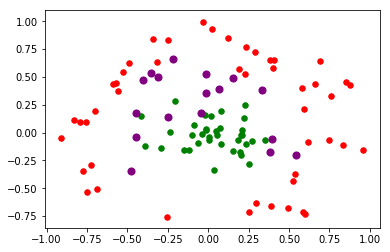

In [129]:
alpha,b=adKernel(dataMat,labelMat,200,0.001,40,1.3)
x1=[];y1=[]
x2=[];y2=[]
x3=[];y3=[]
for i in range(len(labelMat)):
    if labelMat[i]==-1:
        x1.append(dataMat[i][0])
        y1.append(dataMat[i][1])
    if labelMat[i]==1:
        x2.append(dataMat[i][0])
        y2.append(dataMat[i][1])
    if alpha[i]>0:
        x3.append(dataMat[i][0])
        y3.append(dataMat[i][1])
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x1,y1,s=30,c='red')
ax.scatter(x2,y2,s=30,c='green')
ax.scatter(x3,y3,s=50,c='purple')
plt.show()

In [130]:
#采用参数进行预测
fxi=(multiply(alpha,labelMatrix)).T*calKernel(dataMatrix,dataMatrix[i,:],sigma)+b

NameError: name 'labelMatrix' is not defined

In [136]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def loadImages(dirName):
    from os import listdir
    hwLabels = []
    trainingFileList = listdir(dirName)           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr == 9: hwLabels.append(-1)
        else: hwLabels.append(1)
        trainingMat[i,:] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, hwLabels    

def testDigits(sigma=10):
    dataArr,labelArr = loadImages('trainingDigits')
    b,alphas = adKernel(dataArr, labelArr, 200, 0.0001, 10000, sigma)
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] 
    labelSV = labelMat[svInd];
    print "there are %d Support Vectors" % shape(sVs)[0]
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = calKernel(sVs,datMat[i,:],sigma)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    print "the training error rate is: %f" % (float(errorCount)/m)
    dataArr,labelArr = loadImages('testDigits')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = calKernel(sVs,datMat[i,:],sigma)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print "the test error rate is: %f" % (float(errorCount)/m) 

In [137]:
testDigits()

KeyboardInterrupt: 